## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("Ly Data/snow_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '雪生', '列席', '官員', '同仁', '立榮', '航空', '下午', '飛機', '降落', '跳起來', '跳起來', '請問', '部長', '有沒有', '飛機', '交通部', '部長', '答復', '部長', '委員', '委員', '雪生', '側風', 'atr', '飛機', '進場', '機身', '本席', '澎湖', '金門', '狀況', '提醒', '部長', '民航局', '秋冬', '東北', '季風', '本席', '好幾', '飛機', '擺動', '厲害', '航管', '人員', '注意', '側風', '飛機', '重飛', '失敗', '落海', '冬天', '拜託', '局長', '航管', '注意', '部長', '局長', '交通部', '民航局', '局長', '答復', '局長', '委員', '復興', '空難', '發生', 'atr', '機型', '復興航空公司', '檢討', '之外', '立榮', '航空', '公司', '南竿', '北竿', '恆春', '側風', '特別', '落地', '駕駛', '落地', '人員', '訓練', '重新', '訓練', '機場', '側風限', '規範', '側風', '管制', '人員', '更多', '委員', '雪生', '注意', '澎湖', '空難', '發生', '馬祖', '發生', '空難', '最近', '網路', '提及', '弟弟', '不可以', '發生', '縣長', '提出', '機場', '建議', '機場', '建置', '需要', '有沒有', '部長', '規劃', '委員', '雪生', '地方', '提出', '機場', '建議', '中央', '政府', '角度', '中央政府', '財政', '能力', '支付', '部長', '機場', '需要', '多億', '預算', '馬祖', '目前', '流量', '高難度', '工作', '委員', '雪生', '告訴', '縣政府', '高難度', '工作', '機場', '交給', '賭場', '部長', '當初', '規劃', '縣長', '綜合', '規劃', '規劃', '機場', '情況', '做成'

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(12509 unique tokens: ['abc', 'atr', 'sop', '一百多', '上台']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 5), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 5), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 4), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 1), (48, 2), (49, 3), (50, 2), (51, 1), (52, 3), (53, 1), (54, 5), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 3), (65, 6), (66, 1), (67, 2), (68, 2), (69, 1), (70, 3), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 38), (87, 3), (88, 1), (89, 1), (90, 1), (91, 4), (92, 13), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 2), (99, 3), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (1

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/snow_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.07428970656730322), ('雪生', 0.05100139729855613), ('馬祖', 0.030041918956683743), ('大陸', 0.02841173730787145), ('金門', 0.016534699580810434), ('副主任委員', 0.016534699580810434), ('兩岸', 0.01560316721006055), ('昨天', 0.01327433628318584), ('福州', 0.011877037727061016), ('國青', 0.011178388448998603), ('晚上', 0.011178388448998603), ('最近', 0.010945505356311131), ('媒體', 0.01047973917093619), ('臺灣', 0.009548206800186306), ('好像', 0.009082440614811364), ('目前', 0.008616674429436423), ('辦法', 0.008383791336748951), ('關係', 0.007918025151374011), ('廈門', 0.007685142058686539), ('請教', 0.007452258965999069)]

strTM =  1[('委員', 0.04056311142925316), ('發生', 0.03602958721068957), ('調查', 0.026246719160104987), ('雪生', 0.022667621092817943), ('宏智', 0.021951801479360534), ('飛安', 0.02099737532808399), ('委員會', 0.018611309949892626), ('報告', 0.0164638511095204), ('事故', 0.014316392269148175), ('系統', 0.010975900739680267), ('第一', 0.009305654974946313), ('事件', 0.009067048437127178), ('昨天', 0.008112622285850


 Coherence Score:  0.41308073679670765


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.34740547775820696
Num_topics:  6  Coherence Score=  0.3871392073979371
Num_topics:  9  Coherence Score=  0.36677521390411005
Num_topics:  12  Coherence Score=  0.39634836688338143
Num_topics:  15  Coherence Score=  0.4180872460828964
Num_topics:  18  Coherence Score=  0.4174260727735417
Num_topics:  21  Coherence Score=  0.4010914166775591
Num_topics:  24  Coherence Score=  0.40602284118022786
Num_topics:  27  Coherence Score=  0.4091225718519067
Num_topics:  30  Coherence Score=  0.41143710830301766
Num_topics:  33  Coherence Score=  0.41297844269845274


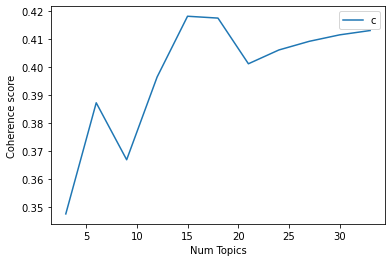

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.3474
Num Topics = 6  has Coherence Value of 0.3871
Num Topics = 9  has Coherence Value of 0.3668
Num Topics = 12  has Coherence Value of 0.3963
Num Topics = 15  has Coherence Value of 0.4181
Num Topics = 18  has Coherence Value of 0.4174
Num Topics = 21  has Coherence Value of 0.4011
Num Topics = 24  has Coherence Value of 0.406
Num Topics = 27  has Coherence Value of 0.4091
Num Topics = 30  has Coherence Value of 0.4114
Num Topics = 33  has Coherence Value of 0.413
Optimal Topic Num = 15  Highest Value = 0.4180872460828964


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.052*"次長" + 0.030*"雪生" + 0.018*"警察" + 0.017*"彥伯" + 0.015*"uber" + '
  '0.013*"業者" + 0.013*"國材" + 0.013*"司長" + 0.011*"同仁" + 0.010*"計程車" + '
  '0.009*"相關" + 0.009*"提到" + 0.008*"裡面" + 0.008*"法令" + 0.007*"好像" + 0.007*"行政" '
  '+ 0.007*"公路總局" + 0.007*"早上" + 0.007*"列席" + 0.007*"討論" + 0.006*"修正" + '
  '0.006*"官員" + 0.006*"交通部" + 0.006*"特別" + 0.006*"報告"'),
 (1,
  '0.226*"部長" + 0.103*"委員" + 0.090*"雪生" + 0.052*"賀陳" + 0.040*"佳龍" + 0.033*"局長" '
  '+ 0.014*"不好" + 0.014*"交通部" + 0.010*"交通" + 0.009*"一點" + 0.007*"航港局" + '
  '0.007*"不敢當" + 0.006*"瞭解" + 0.006*"召委" + 0.006*"虧損" + 0.006*"總統" + '
  '0.005*"真的" + 0.005*"時間" + 0.005*"關係" + 0.005*"早上" + 0.004*"列席" + 0.004*"不錯" '
  '+ 0.004*"同仁" + 0.004*"電話" + 0.004*"執行"'),
 (2,
  '0.030*"委員" + 0.026*"時間" + 0.015*"目前" + 0.012*"地方" + 0.012*"質詢" + 0.012*"情況" '
  '+ 0.012*"檢討" + 0.011*"發生" + 0.011*"將來" + 0.011*"事實" + 0.011*"請問" + '
  '0.010*"需要" + 0.010*"方式" + 0.010*"民眾" + 0.010*"相關" + 0.009*"執政" + 0.009*"研究" '
  '+ 0.008*"政策" + 0.008*"人數" + 0.008*"辦法" + 

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.1706,"委員, 局長, 雪生, 飛機, 機場, 國顯, 航空, 民航局, 公司, 馬祖","[委員, 雪生, 列席, 官員, 同仁, 立榮, 航空, 下午, 飛機, 降落, 跳起來, ..."
1,1,16.0,0.5846,"委員, 局長, 雪生, 馬祖, 建宇, 碼頭, 航港局, 交通部, 黃岐, 人員","[委員, 雪生, 列席, 官員, 同仁, 局長, 辛苦, 戮力, 從公, 眼睛, 弄壞, 國..."
2,2,18.0,0.5493,"委員, 馬祖, 雪生, 部長, 金門, 大學, 署長, 思華, 請問, 預算","[委員, 雪生, 列席, 官員, 同仁, 請問, 部長, 馬祖, 列島, 地名, 文化部, ..."
3,3,18.0,0.4814,"委員, 馬祖, 雪生, 部長, 金門, 大學, 署長, 思華, 請問, 預算","[委員, 雪生, 列席, 官員, 同仁, 離島建設條例, 第九, 三讀通過, 相關, 施行,..."
4,4,13.0,0.4447,"觀光, 委員, 台灣, 觀光局, 永暉, 大陸, 澎湖, 陸客, 人數, 旅遊","[委員, 委員, 雪生, 委員, 聯合, 質詢, 詢答, 時間, 分鐘, 委員, 行政院, ..."
5,5,6.0,0.2344,"本席, 馬祖, 拜託, 同仁, 努力, 關心, 辛苦, 最近, 工作, 真的","[委員, 雪生, 發言, 委員, 雪生, 列席, 官員, 同仁, 部長, 辛苦, 早上, 李..."
6,6,10.0,0.2497,"機場, 馬祖, 規劃, 交通部, 目前, 觀光, 北竿, 報告, 完成, 跨海大橋","[委員, 雪生, 行政院, 院長, 部會, 首長, 同仁, 本席, 院長, 辛苦, 行政院,..."
7,7,13.0,0.3037,"觀光, 委員, 台灣, 觀光局, 永暉, 大陸, 澎湖, 陸客, 人數, 旅遊","[委員, 雪生, 發言, 委員, 雪生, 列席, 官員, 同仁, 委員, 提到, 觀光, 大..."
8,8,5.0,0.4655,"委員, 雪生, 董事長, 公司, 總經理, 次長, 中華, 郵政, 國材, 不好","[委員, 雪生, 質詢, 委員, 雪生, 列席, 官員, 同仁, 副局長, 請問, 機房, ..."
9,9,4.0,0.2375,"部長, 雪生, 委員, 賀陳, 交通部, 時間, 瞭解, 不敢當, 總統, 交通","[委員, 雪生, 列席, 官員, 同仁, 委員, 民眾, 假期, 台灣, 馬路, 那麼多, ..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6387,"委員, 雪生, 馬祖, 大陸, 金門, 副主任委員, 兩岸, 昨天, 福州, 晚上","[委員, 雪生, 列席, 官員, 同仁, 部長, 辛苦, 公務員, 衛福部, 部長, 答復,..."
1,1.0,0.5680,"委員, 發生, 調查, 雪生, 宏智, 飛安, 委員會, 報告, 事故, 系統","[委員, 雪生, 列席, 官員, 同仁, 飛孜會, 業務報告, 第一, 精進, 飛孜, 科技..."
2,2.0,0.5212,"院長, 委員, 貞昌, 玉珍, 本席, 金門, 土地, 行政院, 松山, 部會","[委員, 雪生, 行政院, 院長, 部會, 首長, 同仁, 院長, 早安, 離島, 委員, ..."
3,3.0,0.5400,"工程, 委員, 澤成, 廠商, 單位, 國內, 行政院, 宏謀, 主委, 技術","[委員, 雪生, 列席, 官員, 同仁, 主委, 請問, 行政院, 公共工程會, 任職, 多..."
4,4.0,0.4870,"部長, 雪生, 委員, 賀陳, 交通部, 時間, 瞭解, 不敢當, 總統, 交通","[委員, 雪生, 列席, 官員, 同仁, 部長, 天氣, 本席, 心情, 消息, 消息, 消..."
5,5.0,0.5174,"委員, 雪生, 董事長, 公司, 總經理, 次長, 中華, 郵政, 國材, 不好","[委員, 雪生, 列席, 官員, 同仁, 請教, 次長, 馬祖, 南北竿, 跨海大橋, 看法..."
6,6.0,0.2593,"本席, 馬祖, 拜託, 同仁, 努力, 關心, 辛苦, 最近, 工作, 真的","[委員, 雪生, 列席, 官員, 同仁, 部長, 上任, 二十來, 交通部, 賀陳, 部長,..."
7,7.0,0.5484,"離島, 委員, 金門, 馬祖, 建設, 基金, 地方, 發展, 澎湖, 政府","[委員, 雪生, 行政院, 院長, 部會, 首長, 同仁, 本席, 代表, 金門, 馬祖, ..."
8,8.0,0.4912,"委員, 雪生, 佳龍, 局長, 副局長, 不好, 交通部, 疫情, 紓困, 防疫","[委員, 雪生, 列席, 官員, 同仁, 交通部, 部長, 上臺, 交通部, 公路總局, 局..."
9,9.0,0.6044,"金門, 土地, 馬祖, 政府, 國防部, 轉型, 地政, 正義, 地區, 軍人","[委員, 雪生, 列席, 官員, 同仁, 發現, 轉型, 正罬, 政黨, 總召, 第一, 開..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,15.0,"委員, 局長, 雪生, 飛機, 機場, 國顯, 航空, 民航局, 公司, 馬祖",6.0,0.0323
1.0,16.0,"委員, 局長, 雪生, 馬祖, 建宇, 碼頭, 航港局, 交通部, 黃岐, 人員",9.0,0.0484
2.0,18.0,"委員, 馬祖, 雪生, 部長, 金門, 大學, 署長, 思華, 請問, 預算",7.0,0.0376
3.0,18.0,"委員, 馬祖, 雪生, 部長, 金門, 大學, 署長, 思華, 請問, 預算",11.0,0.0591
4.0,13.0,"觀光, 委員, 台灣, 觀光局, 永暉, 大陸, 澎湖, 陸客, 人數, 旅遊",16.0,0.0860
...,...,...,...,...
181.0,8.0,"委員, 雪生, 佳龍, 局長, 副局長, 不好, 交通部, 疫情, 紓困, 防疫",NaN,NaN
182.0,8.0,"委員, 雪生, 佳龍, 局長, 副局長, 不好, 交通部, 疫情, 紓困, 防疫",NaN,NaN
183.0,12.0,"委員, 次長, 雪生, 局長, 警察, 彥伯, uber, 公路總局, 國材, 計程車",NaN,NaN
184.0,2.0,"院長, 委員, 貞昌, 玉珍, 本席, 金門, 土地, 行政院, 松山, 部會",NaN,NaN
